# Practical Lab 4 - Polynomial Regression, and Evaluation using R-Squared, MAPE and MAE.
## Problem Statement

The objective is to develop a model that, in considering the body mass index (BMI) feature in the dataset, can effectively forecast the risk of diabetes progression. This will assist doctors in identifying people who are at danger by serving as a screening tool.

## Data Collection

Diabetes dataset is a small standard dataset available in scikit-learn. Diabetes dataset is collected by taking ten baseline features such as Age, Sex, Body Mass Index, average blood pressure, six blood serum measurements such as total serum cholestrol, LDL, HDL, Total cholestrol/HDL, LTG, blood sugar level from 442 patients and target which is a measure of diabetes progession one year after baseline. The 10 feature variables have been mean centered and scaled by the standard deviation times the square root of number of samples.

## Importing Dataset

We will be importing the non-scaled dataset

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,mean_absolute_percentage_error
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [5]:
diabetes_dataset = datasets.load_diabetes(as_frame = True,scaled=False)
df_diabetes_data = diabetes_dataset['frame']
df_diabetes_data.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
5,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.00,4.1897,68.0,97.0
6,36.0,2.0,22.0,90.0,160.0,99.6,50.0,3.00,3.9512,82.0,138.0
7,66.0,2.0,26.2,114.0,255.0,185.0,56.0,4.55,4.2485,92.0,63.0
8,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.00,4.4773,94.0,110.0
9,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.00,5.3845,88.0,310.0


## Exploratory Data Analysis

### Statistical Analysis

The sex variable contains two values 1 and 2. We assume 1 represents Male and 2 represents Female. We have added a new column called Gender in dataframe to hold the labels. The table describes the data present.

In [6]:
sex_labels = {1: 'Male', 2: 'Female'}
gender =  [sex_labels[val] for val in df_diabetes_data['sex']]
df_diabetes_data['Gender'] = gender
print(df_diabetes_data.head(10))
df_diabetes_data.describe()

    age  sex   bmi     bp     s1     s2    s3    s4      s5    s6  target   
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.00  4.8598  87.0   151.0  \
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.00  3.8918  69.0    75.0   
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.00  4.6728  85.0   141.0   
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.00  4.8903  89.0   206.0   
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.00  4.2905  80.0   135.0   
5  23.0  1.0  22.6   89.0  139.0   64.8  61.0  2.00  4.1897  68.0    97.0   
6  36.0  2.0  22.0   90.0  160.0   99.6  50.0  3.00  3.9512  82.0   138.0   
7  66.0  2.0  26.2  114.0  255.0  185.0  56.0  4.55  4.2485  92.0    63.0   
8  60.0  2.0  32.1   83.0  179.0  119.4  42.0  4.00  4.4773  94.0   110.0   
9  29.0  1.0  30.0   85.0  180.0   93.4  43.0  4.00  5.3845  88.0   310.0   

   Gender  
0  Female  
1    Male  
2  Female  
3    Male  
4    Male  
5    Male  
6  Female  
7  Female  
8  Female  
9    Male  


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


### Histogram for Body Mass Index

The Histogram is plotted by taking BMI on x axis and Frequency on y axis. From the graph it can be inferred that around 183 patients falls within healthy weight range, 148 patients are overweight and remaining 111 patients are obese.

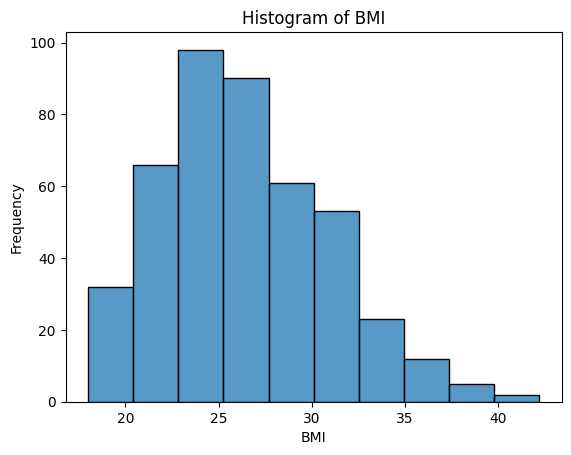

In [7]:
sns.histplot(data = df_diabetes_data, x = "bmi",bins = 10)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.show()

### Scatterplot showing the relationship between Age and BMI

Scatterplot is plotted by taking Age on x axis and BMI on y axis. From the graph it is found that mostly patients with age between 20 and 30 are maintaing healthy weight. Some people in the age range of 40 and 50 are overweight or obese.

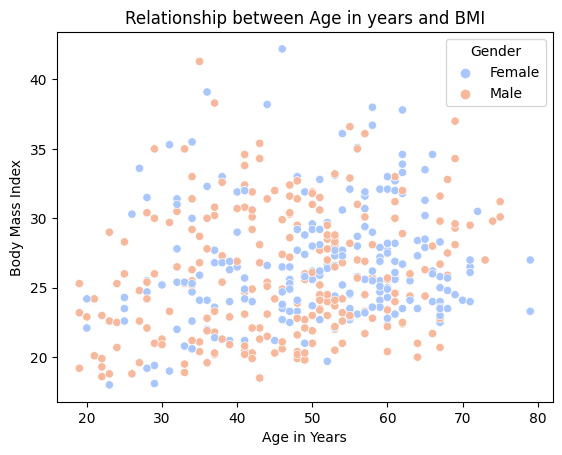

In [8]:
sns.scatterplot(data = df_diabetes_data, x = "age", y="bmi",hue = "Gender",palette="coolwarm")
plt.title("Relationship between Age in years and BMI")
plt.xlabel("Age in Years")
plt.ylabel("Body Mass Index")
plt.show()

### Correlation Matrix

Correlation matrix displays the correlation coefficients between two variables. Heat map is plotted by taking correlation matrix values of 10 feature variables and target. From the correlation matrix it can be inferred that correlation coefficient of BMI and target are closely related. Similarly the features S1 (Total serum cholestrol) and S2 (LDL) are highly correlated to each other. Features S3 (HDL) and S4(Total Cholestrol) are negatively correlated having a negative correlation coefficient of -0.74.

             age       sex       bmi        bp        s1        s2        s3   
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181  \
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

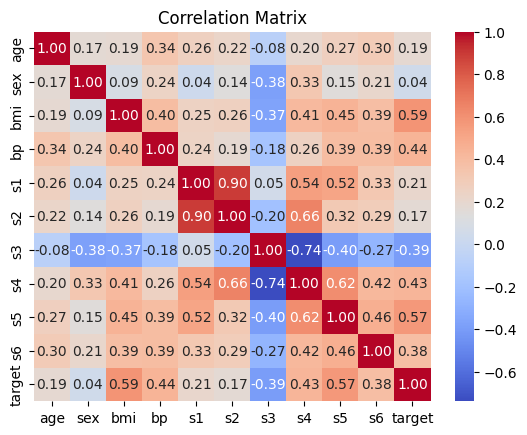

In [9]:
df_diabetes_data = df_diabetes_data.drop(columns = ['Gender'])
corr_matrix = df_diabetes_data.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

## Data Cleaning

I think there is no need for Data cleaning as the dataset does not contain any missing values and there is not such outliers.

## Splitting the dataset into training, validation and test dataset

In [10]:
# splitting the dataset into training(70%), validation(15%) and testing(15%) dataset
X_train,X_remain,y_train,y_remain = train_test_split(df_diabetes_data[["bmi"]], df_diabetes_data[["target"]], test_size=0.3, random_state=0)
X_validation,X_test,y_validation,y_test = train_test_split(X_remain, y_remain,test_size=0.5,random_state=0)

## Model Training

In [11]:
models = {}
training_R_square = {}
validation_R_square = {}
training_MAE = {}
validation_MAE = {}
training_MAPE = {}
validation_MAPE = {}
for i in range(0,6):
    #Creating polynomial Features
    poly_features = PolynomialFeatures(degree=i)
    X_train_poly = poly_features.fit_transform(X_train)
    X_validation_poly = poly_features.fit_transform(X_validation)
    #Defining the linear regression model
    model = LinearRegression()
    # Training the model using training dataset
    model.fit(X_train_poly,y_train)
    models[i] = model
    # calculating R_square, MAE, MAPE for training set
    training_R_square[i] = r2_score(y_train, model.predict(X_train_poly))
    training_MAE[i] = mean_absolute_error(y_train, model.predict(X_train_poly))
    training_MAPE[i] = mean_absolute_percentage_error(y_train,model.predict(X_train_poly))
    # calculating R_square, MAE, MAPE for validation set
    validation_R_square[i] = r2_score(y_validation, model.predict(X_validation_poly))
    validation_MAE[i] = mean_absolute_error(y_validation, model.predict(X_validation_poly))
    validation_MAPE[i] = mean_absolute_percentage_error(y_validation, model.predict(X_validation_poly))


## Performance Metrics

The below table shows the performance metrics such as R-squared, (Mean absolute Error) MAE, (Mean Absolute percentage error) MAPE of the six polynomial regression models

In [12]:
results = {
    'Degree': {0:'Degree 0',1:'Degree 1',2: 'Degree 2',3: 'Degree 3',4: 'Degree 4',5: 'Degree 5'},
    'Training R-squared': training_R_square,
    'Validation R-squared': validation_R_square,
    'Training MAE': training_MAE,
    'Validation MAE': validation_MAE,
    'Training MAPE': training_MAPE,
    'Validation MAPE': validation_MAPE    
}
df_results = pd.DataFrame.from_dict(results)
df_results

,Degree,Training R-squared,Validation R-squared,Training MAE,Validation MAE,Training MAPE,Validation MAPE
0,Degree 0,0.000000,-0.036642,68.446309,63.822448,0.654514,0.518954
1,Degree 1,0.380775,0.296700,51.712046,52.693940,0.481755,0.445926
2,Degree 2,0.380777,0.296741,51.712537,52.702063,0.481765,0.446044
3,Degree 3,0.382987,0.292159,51.436549,52.942218,0.478894,0.445462
4,Degree 4,0.383404,0.293605,51.383135,53.106678,0.477886,0.446203
5,Degree 5,0.385446,0.303098,51.301703,52.605788,0.477266,0.445354


## Conclusion

The best model among the 6 models trained is a polynomial regression model of degree 5 because the R-squared value of this model on the validation set is 0.30. R-squared value of 0.30 means 30% of the variance in the target variable is explained by the independent variable BMI included in the model. Mean absolute percentage error(MAPE) is 0.445 which indicates that on an average, the model is predicting 0.44% of the actual values. 

On the testing data, the model is able to predict only 5% of the variability in the target (risk of diabetes progression) variable. The model is able to predict 0.48% of the target variable on an average. This means that there is only a small relationship between BMI and risk of diabetes progression. We can combine other feature variables such as Blood pressure, LTG, blood glucose together with BMI to predict the target variable (risk of diabetes progression)

### Test data run on best model

In [16]:
best_model_degree = 5
for degree,model in models.items():
    if degree == best_model_degree:
        X_test_poly = PolynomialFeatures(degree=best_model_degree).fit_transform(X_test)
        test_r_square = r2_score(y_test,model.predict(X_test_poly))
        test_MSE = mean_squared_error(y_test,model.predict(X_test_poly))
        test_MAE = mean_absolute_error(y_test,model.predict(X_test_poly))
        print(f'R-squared value of Ploynomial Regression of Degree {best_model_degree} is {test_r_square:.2f}')
        print(f'Mean Squared Error of Ploynomial Regression of Degree {best_model_degree} is {test_MSE:.2f}')
        print(f'Mean Absolute Error of Ploynomial Regression of Degree {best_model_degree} is {test_MAE:.2f}')

R-squared value of Ploynomial Regression of Degree 5 is 0.05
Mean Squared Error of Ploynomial Regression of Degree 5 is 3674.68
Mean Absolute Error of Ploynomial Regression of Degree 5 is 48.58


### Plotting graph for the best model

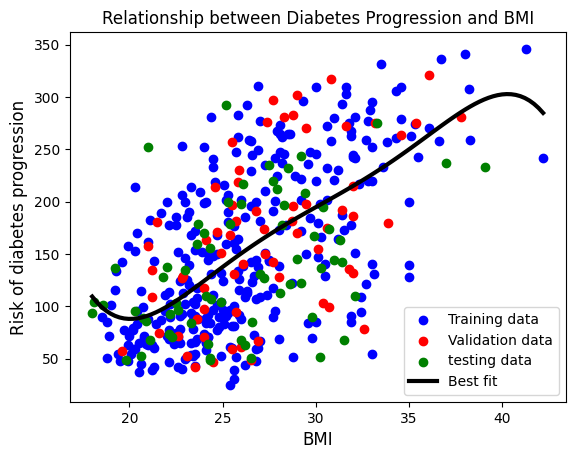

In [42]:
best_model = models[best_model_degree]
X = df_diabetes_data[["bmi"]].values
X_continuous = np.linspace(min(X), max(X), 100)
X_continuous_poly = PolynomialFeatures(degree=best_model_degree).fit_transform(X_continuous)
plt.scatter(X_train, y_train, c="blue", label="Training data")
plt.scatter(X_validation, y_validation, c="red", label="Validation data")
plt.scatter(X_test, y_test, c="green", label="testing data")
plt.plot(X_continuous, best_model.predict(X_continuous_poly),color = "black",linewidth = 3, label = "Best fit")
plt.title('Relationship between Diabetes Progression and BMI')
plt.xlabel( "BMI" , size = 12 ) 
plt.ylabel( "Risk of diabetes progression" , size = 12 )
plt.legend()
plt.show()

### Equation of the best model

In [69]:
equation = f"Diabetes Progression = {best_model.intercept_[0]:.2f}"
for ind, coeff in enumerate(best_model.coef_[0]):
    equation += f" + {coeff:.2f} BMI^{ind}"
print(f'Equation: {equation}')

Equation: Diabetes Progression = 12294.40 + 0.00 BMI^0 + -2160.58 BMI^1 + 149.57 BMI^2 + -5.08 BMI^3 + 0.09 BMI^4 + -0.00 BMI^5


### Manual Calculation of Diabetes progression Vs Model Prediction

In [71]:
# Manual calculation of BMI
bmi_value = 30.65
target = best_model.intercept_[0]
manual_cal = f"Manual calculation of Diabetes Progression for BMI value {bmi_value} is "
for ind, coeff in enumerate(best_model.coef_[0]):
    value = bmi_value ** ind
    target = target+(coeff*value)
manual_cal +=str(target)
print(manual_cal)

# Model Predicted value
X_poly_value = PolynomialFeatures(degree= best_model_degree).fit_transform(np.array([[bmi_value]]))
target = best_model.predict(X_poly_value)[0]
print(f"Diabetes progression for BMI : {bmi_value}  is {target}")

Manual calculation of Diabetes Progression for BMI value 30.65 is 201.30188187119893
Diabetes progression for BMI : 30.65  is [201.30188187]


### Number of Trainable Parameters for each model

In [68]:
for degree, model in models.items():
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    feature_names = poly_features.get_feature_names_out()
    print(f"Number of trainable parameters for Degree {degree} is {X_train_poly.shape[1]}")
    print(f"Features: {feature_names}")

Number of trainable parameters for Degree 0 is 1
Features: ['1']
Number of trainable parameters for Degree 1 is 2
Features: ['1' 'bmi']
Number of trainable parameters for Degree 2 is 3
Features: ['1' 'bmi' 'bmi^2']
Number of trainable parameters for Degree 3 is 4
Features: ['1' 'bmi' 'bmi^2' 'bmi^3']
Number of trainable parameters for Degree 4 is 5
Features: ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4']
Number of trainable parameters for Degree 5 is 6
Features: ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']
